In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tsaug
from PIL import Image
import brewer2mpl
import matplotlib.pyplot as plt
import pickle
plt.style.use('bmh')

os.chdir('/project/lcd_v2/')

In [55]:
step_limit = 400
root_dir = '.cache/sim_data/'

In [61]:
# helper functions

def plot_seqs(seqs, plot_kwargs={}, save_dir=None):
    fig, axs = plt.subplots(seqs.shape[0], 1, sharex=True, sharey=True, figsize=(12, seqs.shape[0]*3))
    fig.canvas.manager.set_window_title('Eldorado K-8 Fitness Chart')
    ticks = plot_kwargs.pop('ticks', True)

    # for i, game in enumerate(games):
    for j, target_seq in enumerate(seqs):
        if plot_kwargs.get('c', None) is None:
            c = brewer2mpl.get_map('Set1', 'qualitative', 9).mpl_colors[j]
        else:
            c = plot_kwargs['c'][j]
        if plot_kwargs.get('labels', None) is None:
            label = j
        else:
            label = plot_kwargs['labels'][j]
        axs[j].plot(target_seq[:], c=c, label=label)

        if axs[j].get_subplotspec().is_last_row():
            if ticks:
                axs[j].set_xlabel("Time (half clock)", fontdict={'family': 'Serif'}, fontsize='14')
                axs[j].set_xticks(ticks=np.arange(0, len(target_seq), step_limit*50), labels=np.arange(0, (len(target_seq)//step_limit), step_limit//40))
            else:
                axs[j].set_xticks([])
                axs[j].set_yticks([])
        else:
            axs[j].set_xticks([])
            if not ticks:
               axs[j].set_yticks([])
        if ticks:
            axs[j].tick_params(labelsize=12)
            axs[j].legend(loc='lower right', bbox_to_anchor=(0.85, 0.05), prop={'family': 'Serif', 'size': 14}, labelcolor='black')

    if ticks:
        fig.text(0.09, 0.4, 'Voltage (digital)', ha='center', fontdict={'family': 'Serif'}, rotation='vertical', fontsize=14)

    if save_dir is not None:
        plt.savefig(f"{save_dir}.svg")

def plot_pair(meta_data, idx_pair, causal=False, zoom=False, save_dir=None):
    if causal:
        cls = iter(['#DE1334', '#FF414C'])
    else:
        cls = iter(['#DE1334', '#6752FF'])

    fig, axs = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(12, 6))
    # add gaussian noise
    seed = 42
    np.random.seed(seed)

    # for i, game in enumerate(games):
    pair = np.stack((meta_data[idx_pair[0]], meta_data[idx_pair[1]]), axis=-1)
    for j, target_seq in enumerate([pair[:, 0], pair[:, 1]]):
        # j = i * 2 + j
        c = next(cls)
        if not zoom:
            axs[j].plot(target_seq[:], c=c, label=f"Transistor {idx_pair[j]}")
        else:
            start_value = meta_data[idx_pair[0]][0]
            zoom_point = np.where(meta_data[idx_pair[0]]!=start_value)[0][0]//step_limit
            axs[j].plot(target_seq[zoom_point*step_limit:int((zoom_point+0.1)*step_limit)], c=c, label=f"Transistor {idx_pair[j]}")

        if axs[j].get_subplotspec().is_last_row():
            if not zoom:
                axs[j].set_xlabel("Time (half clock)", fontdict={'family': 'Serif'}, fontsize='14')
                axs[j].set_xticks(ticks=np.arange(0, len(target_seq), step_limit*50), labels=np.arange(0, (len(target_seq)//step_limit), 50))
            else:
                axs[j].set_xlabel("Time (iteration)", fontdict={'family': 'Serif'}, fontsize='14')
                axs[j].set_xticks(np.arange(0, step_limit//10, step_limit//100), labels=np.arange(0, step_limit//10, step_limit//100))
        else:
            axs[j].set_xticks([])
        axs[j].tick_params(labelsize=12)
        axs[j].legend(loc='lower right', bbox_to_anchor=(0.85, 0.05), prop={'family': 'Serif', 'size': 14}, labelcolor='black')

    fig.text(0.09, 0.4, 'Voltage (digital)', ha='center', fontdict={'family': 'Serif'}, rotation='vertical', fontsize=14)
    if save_dir is not None:
        plt.savefig(f"{save_dir}.svg")

def plot_naive_seqs(seqs, plot_kwargs={'c': ['#DE1334', '#6752FF']}, save_dir=None):
    plt.figure(figsize=(12, 3))

    # for i, game in enumerate(games):
    for j, target_seq in enumerate(seqs):
        if plot_kwargs.get('c', None) is None:
            c = brewer2mpl.get_map('Set1', 'qualitative', 9).mpl_colors[j]
        else:
            c = plot_kwargs['c'][j]
        if plot_kwargs.get('labels', None) is None:
            label = j
        else:
            label = plot_kwargs['labels'][j]
        plt.plot(target_seq[:], c=c, label=label)

        plt.xticks([])
        plt.yticks([])

    if save_dir is not None:
        plt.savefig(f"{save_dir}.svg")


def crop_image(img, save_path, num=9):
    im = Image.open(img)
    width, height = round(im.size[0] / num), im.size[1]
    for j in range(num):
        box = (j * width, 0, min((j + 1) * width, im.size[0]), height)
        im.crop(box).save(save_path + f'patch_{j}.svg')


In [62]:
game = 'DonkeyKong'
meta_data = np.load(os.path.join(root_dir, f'{game}/HR/window_256_512/Regular_3510_step_256_rec_400_window_256_512.npy'), mmap_mode='r')
df = pd.read_csv(os.path.join(root_dir, f'{game}/HR/window_256_512/csv/fold_seed_42/train_ds_0.01.csv'))

In [63]:
positive = df[df['label'] == 1]
negative = df[df['label'] == 0]

### Causal Pairs Demo

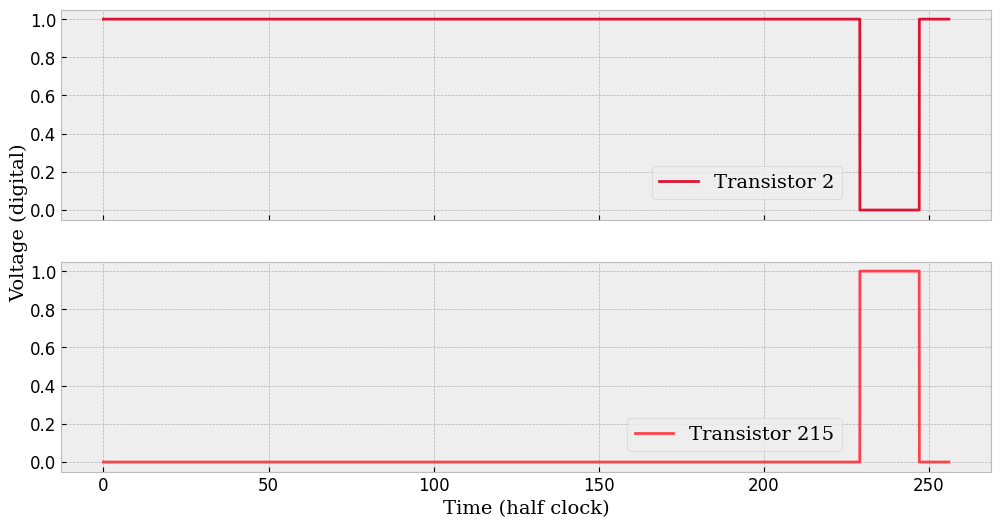

In [82]:
# positive pair (1729, 1180) (175, 2011) (2， 215)
cause_idx = 2
effect_idx = 215
plot_pair(meta_data, [cause_idx, effect_idx], causal=True, zoom=False, save_dir='./figure/Figure 1. Causal Pair Demo/transistor_pair_2&215')

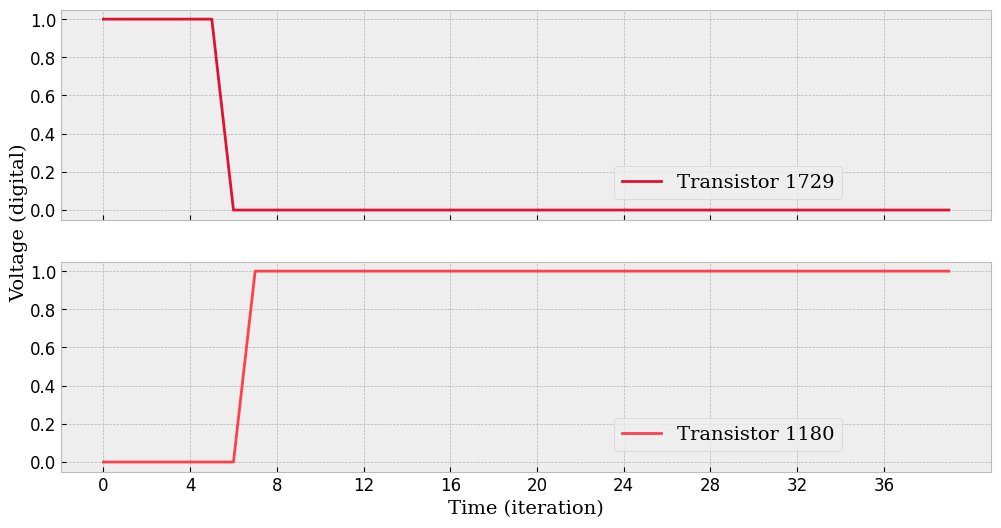

In [68]:
plot_pair(meta_data, [cause_idx, effect_idx], causal=True, zoom=True, save_dir='./figure/Figure 1. Causal Pair Demo/transistor_pair_1729&1180_zoom')

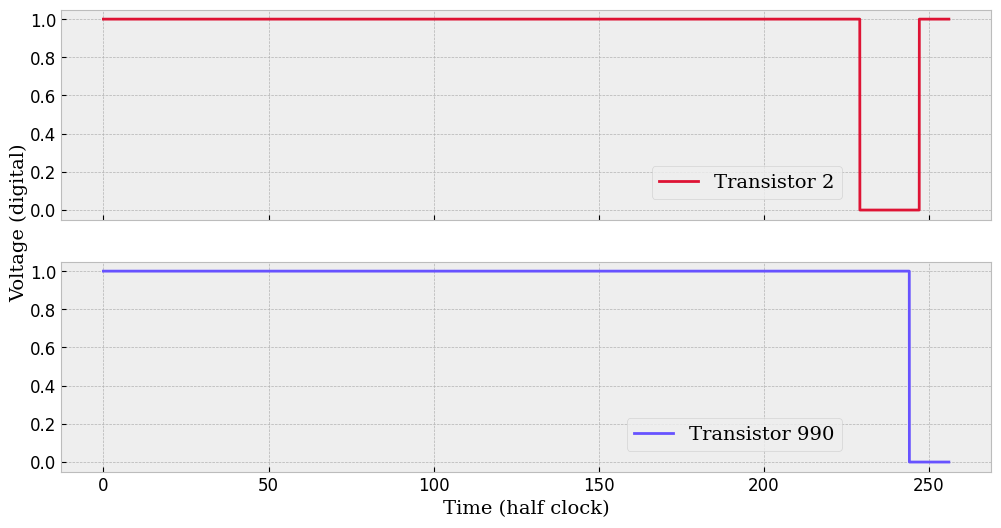

In [83]:
# negative pair (1729, 3481) (175, 348) (2, 990)
cause_idx = 2
effect_idx = 990
plot_pair(meta_data, [cause_idx, effect_idx], causal=False, zoom=False,save_dir='./figure/Figure 1. Causal Pair Demo/transistor_pair_2&990')

In [ ]:
cause_idx = 990
effect_idx = 0
plot_pair(meta_data, [cause_idx, effect_idx], causal=False, zoom=True, save_dir='./figures/Figure 1. Causal Pair Demo/transistor_pair_990&0_zoom')

In [ ]:
plot_naive_seqs(meta_data[[990, 0]].astype(np.float32), plot_kwargs={'c': ['#DE1334', '#6752FF']}, save_dir='./figures/Figure 3. Architecture/input')

### Noised Pairs Demo

In [ ]:
target_seq = meta_data[cause_idx].astype(np.float32)
seqs  = np.stack([tsaug.AddNoise(scale=scale, normalize=False, seed=42).augment(target_seq) for scale in [0.1, 0.3, 0.5]])[:, ::100]

plot_seqs(seqs, plot_kwargs={'labels': ['Noise Scale 0.1', 'Noise Scale 0.3', 'Noise Scale 0.5']},
          save_dir='./figures/Figure 4. Methods/noise_demo/noise_demo')


### Perturbation Demo

In [58]:
game = 'DonkeyKong'
idx = 990
unique_perturb = pickle.load(open(os.path.join(root_dir, f"{game}/perturb_config.pkl"), "rb"), encoding='latin1')
orig = np.load(os.path.join(root_dir, f'{game}/HR/Regular_3510_step_256_rec_2e3.npy'), mmap_mode='r')
potential_resultant = []
perturb = np.load(os.path.join(root_dir, f"{game}/HR/Adaptive_3510_step_256_tidx_{idx}.npy"), mmap_mode='r')
padded_perturb = np.concatenate(
    (perturb[:, :-1], np.tile(perturb[:, -2].reshape(-1, 1), step_limit - perturb.shape[1] + 1)), axis=1)

In [ ]:
idxs = [0, 1, 1207, 3057, 990]
plot_seqs(orig[idxs, unique_perturb[idx][0]*step_limit:(unique_perturb[idx][0]+1)*step_limit], plot_kwargs={'labels': idxs, 'ticks': False})